In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv(r'C:\Users\user\Desktop\insdnn.csv')

In [ ]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,shuffle
0,192.168.3.130-79.204.7.201-0-0-0,79.204.7.201,0,192.168.3.130,0,0,10/01/2020 5:57,23,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.305143
1,192.168.3.130-74.110.125.231-0-0-0,74.110.125.231,0,192.168.3.130,0,0,10/01/2020 5:56,14,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.281390
2,192.168.20.133-31.13.73.35-44344-443-6,192.168.20.133,44344,31.13.73.35,443,6,7/02/2020 15:54,106123463,19,25,...,14860.33333,2206.613771,17408,13552,35400000.0,18600000.0,46100000,13900000,Normal,0.554632
3,192.168.20.133-192.168.20.2-36997-53-17,192.168.20.133,36997,192.168.20.2,53,17,7/02/2020 15:56,3475,1,3,...,0.00000,0.000000,0,0,0.0,0.0,0,0,Normal,0.137247
4,192.168.3.130-114.19.252.16-0-0-0,114.19.252.16,0,192.168.3.130,0,0,10/01/2020 5:56,17,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.423074


In [ ]:
df.Label.value_counts()


DDoS      73529
Normal    68424
Probe     61757
DoS        1145
BFA         295
U2R          17
Name: Label, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [ ]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,shuffle
0,192.168.3.130-79.204.7.201-0-0-0,79.204.7.201,0,192.168.3.130,0,0,10/01/2020 5:57,23,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.305143
1,192.168.3.130-74.110.125.231-0-0-0,74.110.125.231,0,192.168.3.130,0,0,10/01/2020 5:56,14,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.281390
2,192.168.20.133-31.13.73.35-44344-443-6,192.168.20.133,44344,31.13.73.35,443,6,7/02/2020 15:54,106123463,19,25,...,14860.33333,2206.613771,17408,13552,35400000.0,18600000.0,46100000,13900000,Normal,0.554632
3,192.168.20.133-192.168.20.2-36997-53-17,192.168.20.133,36997,192.168.20.2,53,17,7/02/2020 15:56,3475,1,3,...,0.00000,0.000000,0,0,0.0,0.0,0,0,Normal,0.137247
4,192.168.3.130-114.19.252.16-0-0-0,114.19.252.16,0,192.168.3.130,0,0,10/01/2020 5:56,17,0,2,...,0.00000,0.000000,0,0,0.0,0.0,0,0,DDoS,0.423074


In [ ]:
numeric_col = df.select_dtypes(include='number').columns

In [ ]:
df = normalization(df.copy(),numeric_col)

In [ ]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,shuffle
0,192.168.3.130-79.204.7.201-0-0-0,79.204.7.201,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:57,-0.386717,-0.069755,-0.045882,...,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.675653
1,192.168.3.130-74.110.125.231-0-0-0,74.110.125.231,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.758043
2,192.168.20.133-31.13.73.35-44344-443-6,192.168.20.133,1.194108,31.13.73.35,-0.565280,0.057304,7/02/2020 15:54,3.660889,0.221174,0.122659,...,-0.071127,-0.075256,-0.088852,-0.037464,1.512046,8.976133,2.036855,0.382667,Normal,0.189724
3,192.168.20.133-192.168.20.2-36997-53-17,192.168.20.133,0.867106,192.168.20.2,-0.586593,1.978516,7/02/2020 15:56,-0.386585,-0.054443,-0.038554,...,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,Normal,-1.258020
4,192.168.3.130-114.19.252.16-0-0-0,114.19.252.16,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.266598


In [ ]:
bin_label = pd.DataFrame(df.Label.map(lambda x:'normal_traffic' if x=='Normal' else 'attack_traffic'))

In [ ]:
bin_data = df.copy()
bin_data['label'] = bin_label

In [ ]:
le111 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le111.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
le111.classes_

array(['attack_traffic', 'normal_traffic'], dtype=object)

In [ ]:
np.save("le111_classes.npy",le111.classes_,allow_pickle=True)

In [ ]:
bin_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,shuffle,label,intrusion
0,192.168.3.130-79.204.7.201-0-0-0,79.204.7.201,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:57,-0.386717,-0.069755,-0.045882,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.675653,attack_traffic,0
1,192.168.3.130-74.110.125.231-0-0-0,74.110.125.231,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.758043,attack_traffic,0
2,192.168.20.133-31.13.73.35-44344-443-6,192.168.20.133,1.194108,31.13.73.35,-0.565280,0.057304,7/02/2020 15:54,3.660889,0.221174,0.122659,...,-0.088852,-0.037464,1.512046,8.976133,2.036855,0.382667,Normal,0.189724,normal_traffic,1
3,192.168.20.133-192.168.20.2-36997-53-17,192.168.20.133,0.867106,192.168.20.2,-0.586593,1.978516,7/02/2020 15:56,-0.386585,-0.054443,-0.038554,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,Normal,-1.258020,normal_traffic,1
4,192.168.3.130-114.19.252.16-0-0-0,114.19.252.16,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.266598,attack_traffic,0


In [ ]:
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data['label'] = bin_label
bin_data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,shuffle,intrusion,attack_traffic,normal_traffic,label
0,192.168.3.130-79.204.7.201-0-0-0,79.204.7.201,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:57,-0.386717,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.675653,0,1,0,attack_traffic
1,192.168.3.130-74.110.125.231-0-0-0,74.110.125.231,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.758043,0,1,0,attack_traffic
2,192.168.20.133-31.13.73.35-44344-443-6,192.168.20.133,1.194108,31.13.73.35,-0.565280,0.057304,7/02/2020 15:54,3.660889,0.221174,0.122659,...,1.512046,8.976133,2.036855,0.382667,Normal,0.189724,1,0,1,normal_traffic
3,192.168.20.133-192.168.20.2-36997-53-17,192.168.20.133,0.867106,192.168.20.2,-0.586593,1.978516,7/02/2020 15:56,-0.386585,-0.054443,-0.038554,...,-0.368142,-0.102819,-0.372425,-0.360810,Normal,-1.258020,1,0,1,normal_traffic
4,192.168.3.130-114.19.252.16-0-0-0,114.19.252.16,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.266598,0,1,0,attack_traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,192.168.3.130-204.165.150.51-0-0-0,204.165.150.51,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:57,-0.386717,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-1.212489,0,1,0,attack_traffic
205163,192.168.3.130-200.175.2.130-80-34054-6,192.168.3.130,-0.776003,200.175.2.130,1.271554,0.057304,9/01/2020 16:33,-0.386431,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,Probe,-0.959915,0,1,0,attack_traffic
205164,167.60.131.162-192.168.3.130-0-0-0,167.60.131.162,-0.779564,192.168.3.130,-0.589490,-0.990629,10/01/2020 5:56,-0.386717,-0.069755,-0.045882,...,-0.368142,-0.102819,-0.372425,-0.360810,DDoS,-0.753390,0,1,0,attack_traffic
205165,192.168.3.130-200.175.2.130-80-42023-6,200.175.2.130,1.090805,192.168.3.130,-0.585118,0.057304,9/01/2020 16:30,-0.386224,-0.008507,-0.031226,...,-0.368142,-0.102819,-0.372425,-0.360810,Probe,-0.443989,0,1,0,attack_traffic


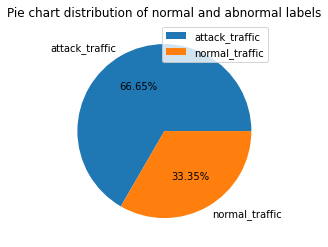

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(4,4))
plt.pie(bin_data.label.value_counts(),labels=bin_data.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()

plt.show()

In [ ]:
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

<ipython-input-41-17421a5fc333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = bin_data['intrusion']


In [ ]:
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

Down/Up Ratio        0.509473
Pkt Len Min          0.543155
Init Bwd Win Byts    0.587147
Src Port             0.624833
Protocol             0.710033
intrusion            1.000000
Name: intrusion, dtype: float64

In [ ]:
numeric_bin = bin_data[['Down/Up Ratio','Pkt Len Min','Init Bwd Win Byts','Src Port','Protocol']]

In [ ]:
bin_data = numeric_bin.join(bin_data[['intrusion','attack_traffic','normal_traffic','label']])

In [ ]:
bin_data.to_csv(r'C:\Users\user\Desktop\bin_data.csv', index=False)

bin_data

,Down/Up Ratio,Pkt Len Min,Init Bwd Win Byts,Src Port,Protocol,intrusion,attack_traffic,normal_traffic,label
0,-0.767976,-0.384251,-0.418137,-0.779564,-0.990629,0,1,0,attack_traffic
1,-0.767976,-0.384251,-0.418137,-0.779564,-0.990629,0,1,0,attack_traffic
2,0.143285,-0.384251,2.420659,1.194108,0.057304,1,0,1,normal_traffic
3,1.965805,1.410404,-0.418137,0.867106,1.978516,1,0,1,normal_traffic
4,-0.767976,-0.384251,-0.418137,-0.779564,-0.990629,0,1,0,attack_traffic
...,...,...,...,...,...,...,...,...,...
205162,-0.767976,-0.384251,-0.418137,-0.779564,-0.990629,0,1,0,attack_traffic
205163,-0.767976,-0.384251,-0.415309,-0.776003,0.057304,0,1,0,attack_traffic
205164,-0.767976,-0.384251,-0.418137,-0.779564,-0.990629,0,1,0,attack_traffic
205165,0.143285,-0.384251,-0.408592,1.090805,0.057304,0,1,0,attack_traffic


In [ ]:
bin_data = pd.read_csv(r'C:\Users\user\Desktop\bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)

le111_classes_ = np.load('le111_classes.npy',allow_pickle=True)


In [ ]:
X = bin_data.iloc[:,0:4]
Y = bin_data['intrusion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=le111_classes_))

                precision    recall  f1-score   support

attack_traffic       0.97      1.00      0.98     40954
normal_traffic       0.99      0.94      0.96     20597

      accuracy                           0.98     61551
     macro avg       0.98      0.97      0.97     61551
  weighted avg       0.98      0.98      0.98     61551



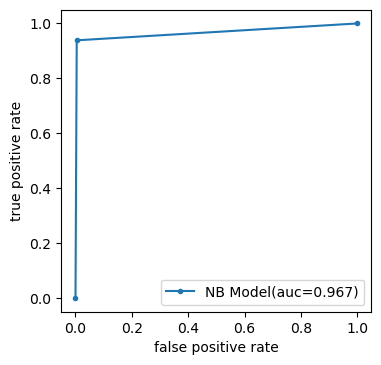

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
ll_tpr,ll_fpr,threshold=roc_curve(y_test,y_pred)
auc_ll=auc(ll_tpr,ll_fpr)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(ll_tpr,ll_fpr ,marker='.',label='NB Model(auc=%0.3f)'%auc_ll)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=16)


logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=le111_classes_))

                precision    recall  f1-score   support

attack_traffic       0.97      1.00      0.98     40954
normal_traffic       1.00      0.94      0.97     20597

      accuracy                           0.98     61551
     macro avg       0.98      0.97      0.98     61551
  weighted avg       0.98      0.98      0.98     61551



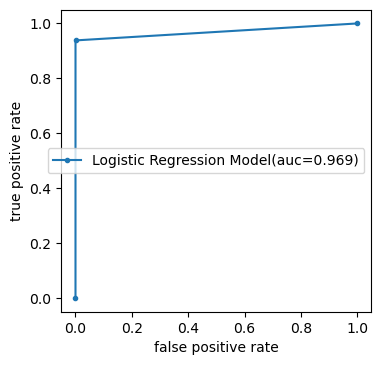

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
ll_tpr,ll_fpr,threshold=roc_curve(y_test,y_pred)
auc_ll=auc(ll_tpr,ll_fpr)
plt.figure(figsize=(4,4),dpi=100)
plt.plot(ll_tpr,ll_fpr ,marker='.',label='Logistic Regression Model(auc=%0.3f)'%auc_ll)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()